<a href="https://colab.research.google.com/github/PraveenRautela/WEEK_7_AI/blob/main/Week7_AI__2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt


In [ ]:
# Part 1: Binary Bandits (A and B)

# Defining binaryBanditA as a Python function
def binaryBanditA(action):
    p = [0.1, 0.2]  # Probabilities of success for actions 1 and 2
    return 1 if random.random() < p[action - 1] else 0

In [ ]:
# Defining binaryBanditB as a Python function
def binaryBanditB(action):
    p = [0.8, 0.9]  # Probabilities of success for actions 1 and 2
    return 1 if random.random() < p[action - 1] else 0


In [ ]:
# Epsilon-greedy agent to choose the best action for maximizing rewards
def epsilon_greedy(bandit_func, num_steps=1000, epsilon=0.1):
    rewards = np.zeros(2)  # Storing the total rewards for actions 1 and 2
    counts = np.zeros(2)   # Counting the number of times each action is selected

    reward_history = []

    for _ in range(num_steps):
        # Epsilon-greedy action selection
        if random.random() < epsilon:
            action = random.choice([1, 2])  # Explore
        else:
            action = np.argmax(rewards / (counts + 1e-10)) + 1  # Exploit

        # Get the reward from the selected action
        reward = bandit_func(action)

        # Update reward and count for the action
        rewards[action - 1] += reward
        counts[action - 1] += 1

        # Store the average reward at this step
        reward_history.append(np.sum(rewards) / (np.sum(counts) + 1e-10))

    return rewards, counts, reward_history


In [ ]:
# Running the epsilon-greedy algorithm on binaryBanditA
rewards_A, counts_A, reward_history_A = epsilon_greedy(binaryBanditA, num_steps=1000, epsilon=0.1)


In [ ]:
# Running the epsilon-greedy algorithm on binaryBanditB
rewards_B, counts_B, reward_history_B = epsilon_greedy(binaryBanditB, num_steps=1000, epsilon=0.1)


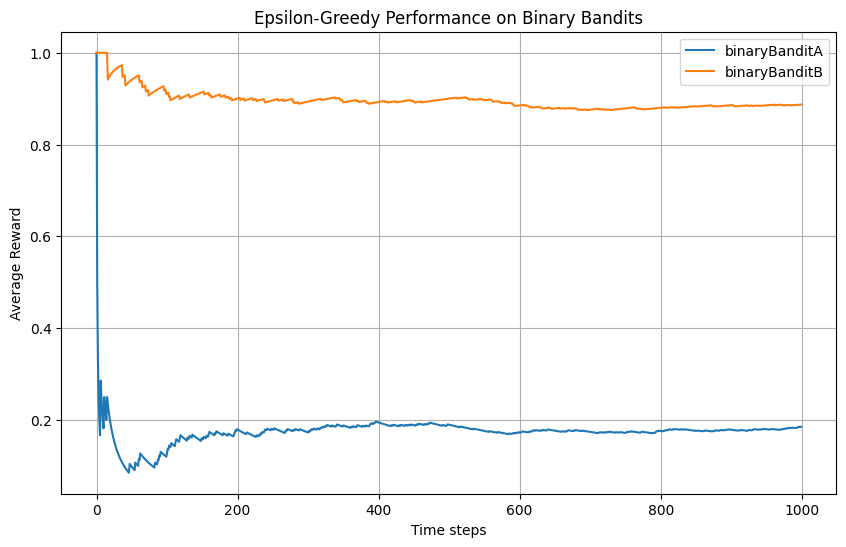

In [ ]:
# Plotting the reward history for both bandits
plt.figure(figsize=(10, 6))
plt.plot(reward_history_A, label="binaryBanditA")
plt.plot(reward_history_B, label="binaryBanditB")
plt.xlabel("Time steps")
plt.ylabel("Average Reward")
plt.title("Epsilon-Greedy Performance on Binary Bandits")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Part 2: Non-Stationary 10-Armed Bandit

In [ ]:
# Non-Stationary 10-Armed Bandit class
class NonStationaryBandit:
    def __init__(self, num_actions=10):
        self.num_actions = num_actions
        self.q_true = np.zeros(num_actions)  # True action values (start all at 0)

    def take_action(self, action):
        # Reward is a random draw from a normal distribution centered at q_true[action]
        return np.random.randn() + self.q_true[action]

    def update(self):
        # Non-stationary behavior: all q_true values take a random walk
        self.q_true += np.random.normal(0, 0.01, self.num_actions)


In [ ]:
# Modified epsilon-greedy agent for non-stationary rewards
def epsilon_greedy_non_stationary(bandit, num_steps=10000, epsilon=0.1, alpha=None):
    rewards = np.zeros(bandit.num_actions)  # Estimated action values
    counts = np.zeros(bandit.num_actions)   # Counting the number of times each action is selected

    reward_history = []

    for step in range(num_steps):
        # Epsilon-greedy action selection
        if random.random() < epsilon:
            action = random.choice(range(bandit.num_actions))  # Explore
        else:
            action = np.argmax(rewards)  # Exploit

        # Get the reward for the selected action
        reward = bandit.take_action(action)

        # Update reward estimates (using constant step-size if alpha is specified)
        if alpha is not None:
            rewards[action] += alpha * (reward - rewards[action])
        else:
            counts[action] += 1
            rewards[action] += (1 / counts[action]) * (reward - rewards[action])

        # Track the average reward history
        reward_history.append(np.mean(rewards))

        # Update the bandit's true rewards (non-stationary aspect)
        bandit.update()

    return rewards, counts, reward_history

In [ ]:
# Create the 10-armed bandit
bandit_nonstat = NonStationaryBandit()


In [ ]:
# Running the epsilon-greedy algorithm with non-stationary rewards for 10000 time steps
rewards_nonstat, counts_nonstat, reward_history_nonstat = epsilon_greedy_non_stationary(bandit_nonstat, num_steps=10000, epsilon=0.1, alpha=0.1)


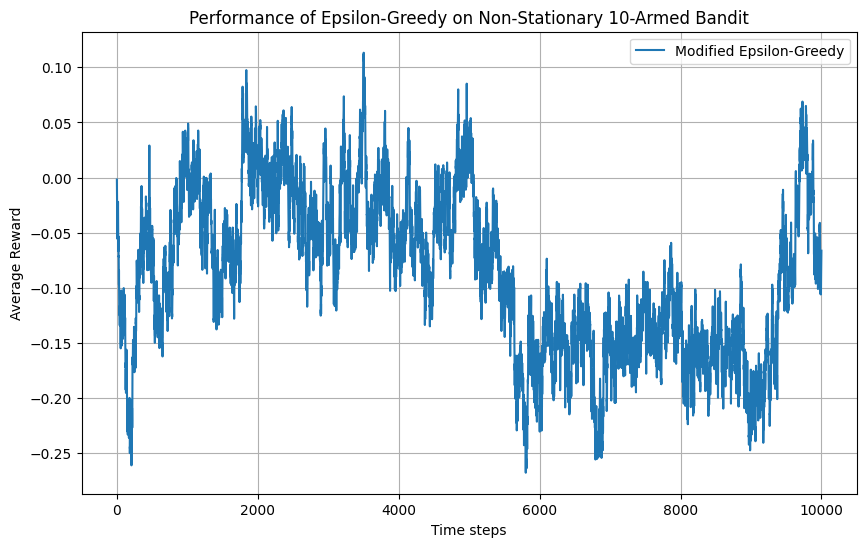

In [ ]:
# Plotting the reward history for the 10-armed bandit
plt.figure(figsize=(10, 6))
plt.plot(reward_history_nonstat, label="Modified Epsilon-Greedy")
plt.xlabel("Time steps")
plt.ylabel("Average Reward")
plt.title("Performance of Epsilon-Greedy on Non-Stationary 10-Armed Bandit")
plt.legend()
plt.grid(True)
plt.show()